In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/captions.txt
/kaggle/input/Images/3226254560_2f8ac147ea.jpg
/kaggle/input/Images/214543992_ce6c0d9f9b.jpg
/kaggle/input/Images/2366643786_9c9a830db8.jpg
/kaggle/input/Images/3368819708_0bfa0808f8.jpg
/kaggle/input/Images/2190227737_6e0bde2623.jpg
/kaggle/input/Images/2752809449_632cd991b3.jpg
/kaggle/input/Images/3097776588_312932e438.jpg
/kaggle/input/Images/1206506157_c7956accd5.jpg
/kaggle/input/Images/1319634306_816f21677f.jpg
/kaggle/input/Images/2465218087_fca77998c6.jpg
/kaggle/input/Images/3351493005_6e5030f596.jpg
/kaggle/input/Images/2949337912_beba55698b.jpg
/kaggle/input/Images/534886684_a6c9f40fa1.jpg
/kaggle/input/Images/3543600125_223747ef4c.jpg
/kaggle/input/Images/2174206711_11cb712a8d.jpg
/kaggle/input/Images/280706862_14c30d734a.jpg
/kaggle/input/Images/2100735137_05c6079537.jpg
/kaggle/input/Images/3131632154_098f86f4cb.jpg
/kaggle/input/Images/2236016316_f476cbbf06.jpg
/kaggle/input/Images/3335375223_b4da8df523.jpg
/kaggle/input/Images/929679367_ff8c7

# Vit Gpt2

In [1]:
!pip uninstall -y peft

Found existing installation: peft 0.14.0
Uninstalling peft-0.14.0:
  Successfully uninstalled peft-0.14.0


In [2]:
!pip uninstall -y transformers
!pip install --no-cache-dir transformers==4.31.0 accelerate

Found existing installation: transformers 4.51.1
Uninstalling transformers-4.51.1:
  Successfully uninstalled transformers-4.51.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.9/116.9 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 128.8 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 206.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 225.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 126.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 286.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 213.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 237.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 266.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 276.9 MB/s 

In [3]:
!pip install -q --no-deps rouge_score bert_score

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 2.1 MB/s eta 0:00:00


In [4]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 7.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sentence-transformers 3.4.1 requires transformers<5.0.0,>=4.41.0, but you have transformers 4.31.0 which is incompatible.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.12.0 which is incompatible.
bigframes 1.36.0 requires rich<14,>=12.4.4, but you have rich 14.0.0 which is incompatible.


In [5]:
!pip install -q --no-cache-dir pycocoevalcap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.3/104.3 MB 149.7 MB/s eta 0:00:0000:010:01


In [8]:
from transformers import (
    VisionEncoderDecoderModel, ViTImageProcessor, AutoTokenizer,
    Seq2SeqTrainingArguments, Seq2SeqTrainer, set_seed
)
import torch, pandas as pd, numpy as np, evaluate
import os
from torchvision import transforms
from torch.utils.data import Dataset
from PIL import Image
from pycocoevalcap.cider.cider import Cider as CiderScorer

# Setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
set_seed(42)
csv_file, img_dir = "/kaggle/input/captions.txt", "/kaggle/input/Images"
EPOCHS, BATCH_SIZE, LR, MAX_SEQ_LEN = 5, 2, 5e-5, 32

# Data prep (unchanged)
df = pd.read_csv(csv_file)
fe = ViTImageProcessor.from_pretrained("google/vit-base-patch16-224-in21k")
tok = AutoTokenizer.from_pretrained("gpt2")
tok.pad_token = tok.pad_token or tok.eos_token
tok.padding_side = "right"

class ImgCapDS(Dataset):
    def __init__(self, df):
        self.df  = df.reset_index(drop=True)
        self.tfm = transforms.Resize((224,224))
    def __len__(self):
        return len(self.df)
    def __getitem__(self, i):
        row = self.df.iloc[i]
        # now row.image should be something like "2696060728_3043cfc38c.jpg"
        img_path = os.path.join(img_dir, row.image)
        img = Image.open(img_path).convert("RGB")
        pv  = fe(self.tfm(img), return_tensors="pt").pixel_values.squeeze()
        ids = tok(row.caption, padding="max_length", truncation=True,
                  max_length=MAX_SEQ_LEN).input_ids
        ids = [(x if x!=tok.pad_token_id else -100) for x in ids]
        return {"pixel_values":pv, "labels":torch.tensor(ids)}

full = ImgCapDS(df)
tr_sz = int(0.95*len(full))
train_ds, val_ds = torch.utils.data.random_split(full, [tr_sz, len(full)-tr_sz])

# Model (with cross-modal attention)
model = VisionEncoderDecoderModel.from_encoder_decoder_pretrained(
    "google/vit-base-patch16-224-in21k","gpt2"
)
cfg = model.config
cfg.decoder_start_token_id = tok.bos_token_id
cfg.eos_token_id           = tok.eos_token_id
cfg.pad_token_id           = tok.pad_token_id
cfg.max_length             = MAX_SEQ_LEN
for p in model.encoder.parameters(): p.requires_grad=False
model.to(device)

# Collator
def shift(labels):
    s = torch.full_like(labels, tok.pad_token_id)
    s[:,0], s[:,1:] = cfg.decoder_start_token_id, labels[:,:-1]
    s[labels==-100] = -100
    return s

def collate(batch):
    pv  = torch.stack([b["pixel_values"] for b in batch])
    lab = torch.stack([b["labels"]       for b in batch])
    din = shift(lab.clone().masked_fill(lab==-100, tok.pad_token_id))
    return {"pixel_values":pv, "labels":lab, "decoder_input_ids":din}

# Trainer args
common = dict(
    num_train_epochs=EPOCHS, per_device_train_batch_size=BATCH_SIZE,
    learning_rate=LR, logging_steps=100, evaluation_strategy="no",
    save_strategy="no", report_to="none", remove_unused_columns=False
)
args_cross = Seq2SeqTrainingArguments(output_dir="out_cross", **common)

trainer = Seq2SeqTrainer(
    model=model, args=args_cross,
    train_dataset=train_ds, data_collator=collate
)
trainer.train()

# Metrics helpers (with CIDEr)
bleu   = evaluate.load("bleu")
meteor = evaluate.load("meteor")
rouge  = evaluate.load("rouge")
berts  = evaluate.load("bertscore")
def cider_score(preds, refs):
    """
    preds : List[str]       — one generated caption per image
    refs  : List[List[str]] — list of N ground-truth captions per image
    returns float in [0,100]
    """
    scorer = CiderScorer()
    gts, res = {}, {}
    for i, (pred, ref_list) in enumerate(zip(preds, refs)):
        res[i] = [pred]      # list with exactly one candidate
        gts[i] = ref_list    # list of references
    score, _ = scorer.compute_score(gts, res)
    return score

def score(refs, hyps):
    bs = berts.compute(references=refs, predictions=hyps, lang="en")["f1"]
    return {
        "BLEU-4":     bleu.compute(references=refs, predictions=hyps)["bleu"],
        "METEOR":     meteor.compute(references=refs, predictions=hyps)["meteor"],
        "ROUGE-L":    rouge.compute(references=refs, predictions=hyps)["rougeL"],
        "BERTScore":  float(np.mean(bs)),
        "CIDEr":      cider_score(hyps, refs),
    }

def evaluate_val(m):
    m.eval(); refs,hyps = [],[]
    for ex in val_ds:
        with torch.no_grad():
            out = m.generate(
                ex["pixel_values"].unsqueeze(0).to(device),
                max_length=MAX_SEQ_LEN, num_beams=4,
                eos_token_id=tok.eos_token_id, pad_token_id=tok.pad_token_id
            )[0]
        hyps.append(tok.decode(out, skip_special_tokens=True))
        refs.append([tok.decode(ex["labels"][ex["labels"]!=-100], skip_special_tokens=True)])
    return score(refs, hyps)

print("Baseline:", evaluate_val(model))


/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:896: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Using pad_token, but it is not set yet.
Some weights of GPT2LMHeadModel were not initialized from the model checkpoint at gpt2 and are newly initialized: ['h.7.ln_cross_attn.bias', 'h.1.crossattention.q_attn.weight', 'h.8.ln_cross_attn.bias', 'h.2.ln_cross_attn.bias', 'h.9.crossattention.q_attn.weight', 'h.8.crossattention.c_proj.weight', 'h.9.crossattention.c_proj.bias', 'h.10.ln_cross_attn.weight', 'h.9.ln_cross_attn.weight', 'h.6.crossattention.c_proj.bias', 'h.4.ln_cross_attn.bias', 'h.10.ln_cross_attn.bias', 'h.5.crossattention.c_attn.bias', 'h.11.crossattention.q_attn.bias', 'h.11.ln_cross_attn.bias', 'h.1.crossattention.c_proj.bias', 'h.2.crossattention.q_attn.bias', 'h.11.crossattention.q_attn.weight

Step,Training Loss
100,3.572000
200,3.536700
300,3.307700
400,3.286400
500,3.248300
600,3.130400
700,3.118800
800,3.079900
900,3.112400
1000,3.052400


[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


/usr/local/lib/python3.11/dist-packages/transformers/generation/utils.py:1270: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use a generation configuration file (see https://huggingface.co/docs/transformers/main_classes/text_generation )
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:896: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Baseline: {'BLEU-4': 0.04237773134951847, 'METEOR': 0.3023027835974175, 'ROUGE-L': 0.23646229249126788, 'BERTScore': 0.8869531389456602, 'CIDEr': 0.06161992366904219}


In [10]:
# ─── Build a dict: image_filename → list of its 5 captions ────────────────
ref_dict = df.groupby("image")["caption"].apply(list).to_dict()

# ─── New evaluator that uses all refs per image ────────────────────────────
def evaluate_val_grouped(model):
    model.eval()
    refs, hyps = [], []
    for idx in val_ds.indices:                              # idx into df/full
        image_fname = df.iloc[idx]["image"]
        # pull the pixel_values from your base dataset, named `full`
        ex = full[idx]
        pv = ex["pixel_values"].unsqueeze(0).to(device)

        with torch.no_grad():
            out_ids = model.generate(
                pv,
                max_length=MAX_SEQ_LEN,
                num_beams=4,
                eos_token_id=tok.eos_token_id,
                pad_token_id=tok.pad_token_id,
            )[0]

        hyps.append(tok.decode(out_ids, skip_special_tokens=True))
        refs.append(ref_dict[image_fname])                  # ← a list of 5 strings

    return score(refs, hyps)

# ─── And now run it ────────────────────────────────────────────────────────
print("Baseline (all-refs):", evaluate_val_grouped(model))

Baseline (all-refs): {'BLEU-4': 0.15683593906510426, 'METEOR': 0.48086220742157215, 'ROUGE-L': 0.35716086573712147, 'BERTScore': 0.8987235456955533, 'CIDEr': 0.063864408299458}


In [11]:
from transformers import GPT2Config, GPT2LMHeadModel

# 1. make a tiny subclass that ignores encoder inputs
class GPT2NoCross(GPT2LMHeadModel):
    def forward(self, *args, **kwargs):
        kwargs.pop("encoder_hidden_states", None)
        kwargs.pop("encoder_attention_mask", None)
        return super().forward(*args, **kwargs)

# 2. build decoder with cross-attention layers OFF
dec_cfg = GPT2Config.from_pretrained(
    "gpt2", add_cross_attention=False, is_decoder=True
)
decoder = GPT2NoCross.from_pretrained("gpt2", config=dec_cfg)

# 3. assemble ViT→NoCrossGPT2
abl = VisionEncoderDecoderModel.from_encoder_decoder_pretrained(
    "google/vit-base-patch16-224-in21k", None, decoder_model=decoder
)
cfg = abl.config
cfg.decoder_start_token_id = tok.bos_token_id
cfg.eos_token_id           = tok.eos_token_id
cfg.pad_token_id           = tok.pad_token_id
cfg.max_length             = MAX_SEQ_LEN
for p in abl.encoder.parameters(): p.requires_grad=False
abl.to(device)

# 4. train
args_nocross = Seq2SeqTrainingArguments(output_dir="out_nocross", **common)
trainer_nocross = Seq2SeqTrainer(
    model=abl, args=args_nocross,
    train_dataset=train_ds, data_collator=collate
)
trainer_nocross.train()

# 5. evaluate
print("Ablation:", evaluate_val_grouped(abl))


/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:896: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss
100,3.580000
200,3.519900
300,3.358200
400,3.300300
500,3.301300
600,3.193900
700,3.184900
800,3.192000
900,3.242100
1000,3.201600


/usr/local/lib/python3.11/dist-packages/transformers/generation/utils.py:1270: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use a generation configuration file (see https://huggingface.co/docs/transformers/main_classes/text_generation )
  warnings.warn(


Ablation: {'BLEU-4': 0.03341034761745932, 'METEOR': 0.26009036869100965, 'ROUGE-L': 0.22443325266385175, 'BERTScore': 0.8634047819963494, 'CIDEr': 0.004566627052591863}


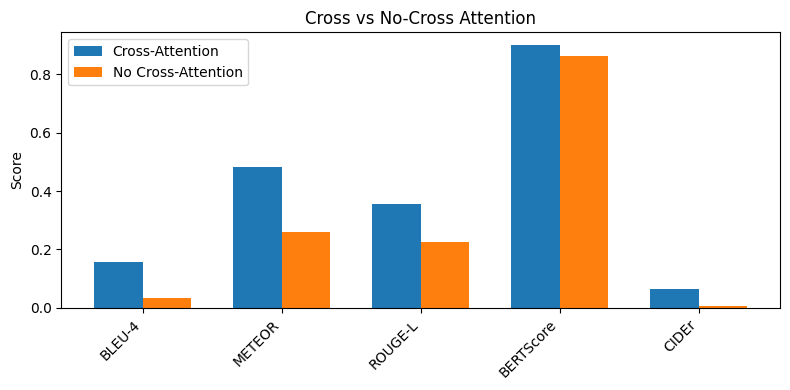

In [12]:
import matplotlib.pyplot as plt

# 3) Compute metrics for both runs
cross_metrics    = evaluate_val_grouped(model)
no_cross_metrics = evaluate_val_grouped(abl)

# 4) Plot
metrics      = list(cross_metrics.keys())
cross_scores = [cross_metrics[m]    for m in metrics]
no_scores    = [no_cross_metrics[m] for m in metrics]

x     = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(8,4))
plt.bar(x - width/2, cross_scores, width, label='Cross-Attention')
plt.bar(x + width/2, no_scores,    width, label='No Cross-Attention')
plt.xticks(x, metrics, rotation=45, ha='right')
plt.ylabel('Score')
plt.title('Cross vs No-Cross Attention')
plt.legend()
plt.tight_layout()
plt.show()

In [15]:
import requests
from io import BytesIO
from PIL import Image  # if not already imported
import torch            # if not already imported

def predict_caption_from_url(url, model, feature_extractor, tokenizer, device,
                             max_length=MAX_SEQ_LEN, num_beams=4):
    model.eval()
    resp = requests.get(url)
    img  = Image.open(BytesIO(resp.content)).convert("RGB")
    pv   = feature_extractor(img, return_tensors="pt").pixel_values.to(device)
    with torch.no_grad():
        out_ids = model.generate(
            pv,
            max_length=max_length,
            num_beams=num_beams,
            eos_token_id=tokenizer.eos_token_id,
            pad_token_id=tokenizer.pad_token_id,
        )
    return tokenizer.decode(out_ids[0], skip_special_tokens=True)

# Pick any image URL
test_url = "https://images.pexels.com/photos/1108099/pexels-photo-1108099.jpeg"

cap_cross   = predict_caption_from_url(test_url, model, fe, tok, device)
cap_nocross = predict_caption_from_url(test_url, abl,   fe, tok, device)

print("Caption with Cross-Attention:    ", cap_cross)
print("Caption without Cross-Attention: ", cap_nocross)

Caption with Cross-Attention:     A yellow dog is running through the grass with its tongue hanging out. Incredible how long it takes to chew. Incredible how much it takes to chew. Incredible
Caption without Cross-Attention:  A man and a woman are sitting on a bench in front of a building. Sooners football team members are on the team waiting. Sooners fans are


In [16]:
import requests
from io import BytesIO
from PIL import Image  # if not already imported
import torch            # if not already imported

def predict_caption_from_url(url, model, feature_extractor, tokenizer, device,
                             max_length=MAX_SEQ_LEN, num_beams=4):
    model.eval()
    resp = requests.get(url)
    img  = Image.open(BytesIO(resp.content)).convert("RGB")
    pv   = feature_extractor(img, return_tensors="pt").pixel_values.to(device)
    with torch.no_grad():
        out_ids = model.generate(
            pv,
            max_length=max_length,
            num_beams=num_beams,
            eos_token_id=tokenizer.eos_token_id,
            pad_token_id=tokenizer.pad_token_id,
        )
    return tokenizer.decode(out_ids[0], skip_special_tokens=True)

# Pick any image URL
test_url = "https://images.unsplash.com/photo-1575936123452-b67c3203c357?fm=jpg&q=60&w=3000&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8Mnx8aW1hZ2V8ZW58MHx8MHx8fDA%3D"

cap_cross   = predict_caption_from_url(test_url, model, fe, tok, device)
cap_nocross = predict_caption_from_url(test_url, abl,   fe, tok, device)

print("Caption with Cross-Attention:    ", cap_cross)
print("Caption without Cross-Attention: ", cap_nocross)

Caption with Cross-Attention:     A girl in a pink hat takes a picture with a digital camera. Another girl takes a picture. Another girl takes a picture. Another girl takes a picture
Caption without Cross-Attention:  A man and a woman are sitting on a bench in front of a building. Sooners football team members are on the team waiting. Sooners fans are


In [18]:
import requests
from io import BytesIO
from PIL import Image  # if not already imported
import torch            # if not already imported

def predict_caption_from_url(url, model, feature_extractor, tokenizer, device,
                             max_length=MAX_SEQ_LEN, num_beams=4):
    model.eval()
    resp = requests.get(url)
    img  = Image.open(BytesIO(resp.content)).convert("RGB")
    pv   = feature_extractor(img, return_tensors="pt").pixel_values.to(device)
    with torch.no_grad():
        out_ids = model.generate(
            pv,
            max_length=max_length,
            num_beams=num_beams,
            eos_token_id=tokenizer.eos_token_id,
            pad_token_id=tokenizer.pad_token_id,
        )
    return tokenizer.decode(out_ids[0], skip_special_tokens=True)

# Pick any image URL
test_url = "https://images.unsplash.com/photo-1593696954577-ab3d39317b97?fm=jpg&q=60&w=3000&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8MTF8fGZyZWUlMjBpbWFnZXN8ZW58MHx8MHx8fDA%3D"

cap_cross   = predict_caption_from_url(test_url, model, fe, tok, device)
cap_nocross = predict_caption_from_url(test_url, abl,   fe, tok, device)

print("Caption with Cross-Attention:    ", cap_cross)
print("Caption without Cross-Attention: ", cap_nocross)

Caption with Cross-Attention:     A person is standing in front of a golden retriever in a field. Another person is taking a photograph. Another person is standing in the distance. Another
Caption without Cross-Attention:  A man and a woman are sitting on a bench in front of a building. Sooners football team members are on the team waiting. Sooners fans are
